In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#for visualization

/kaggle/input/haberman/haberman.csv


before doing anything read the description....


Haberman data set for cancer survival
Haverman data set is the result of the research conducted between 1958 and 1970 to examine the patient will survived for less than 5 years or grater than equal to five years after operation. The study was held at the University of Chicago's Billings Hospital.

**Content**
It contains the three features and two classes
all columns are numerical data

Number of Instances: 306
Number of Attributes: 4 (including the class attribute)
Attribute Information:
Age of patient at time of operation (numerical)
Patients year of operation (year - 1900, numerical)
Number of positive axillary nodes detected (numerical)
Survival status (class attribute) 1 = the patient survived 5 years or longer 
2 = the patient died within 5 year
Missing Attribute Values: None

In [2]:
df = pd.read_csv('/kaggle/input/haberman/haberman.csv')

In [3]:
df.head()
#top-most values of the dataset

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
df.shape
#our dataset have 306 rows and 4 columns

(306, 4)

In [5]:
df.columns
#columns of the dataset

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [6]:
df['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

In [7]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB


**#observations**
* Only 225 patients survived 5 years or longer
* And 81 the patient died within 5 year

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


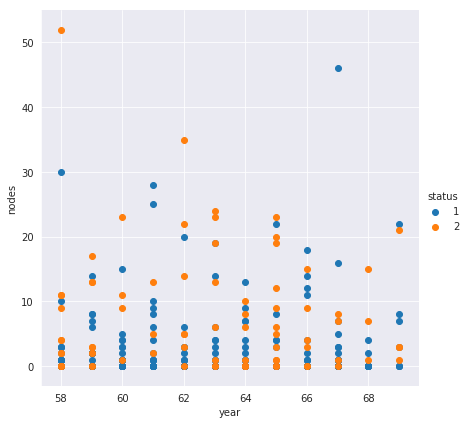

In [9]:
sns.set_style("darkgrid");
sns.FacetGrid(df, hue='status', size=6).map(plt.scatter, "year", "nodes").add_legend();
plt.show();

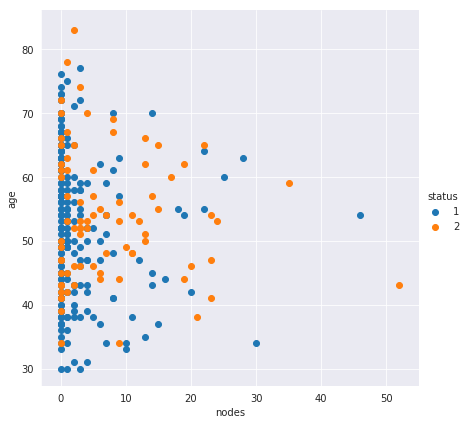

In [10]:
sns.set_style('darkgrid');
sns.FacetGrid(df, hue='status' , size=6).map(plt.scatter, 'nodes', 'age').add_legend();
plt.show()

**Histogram**

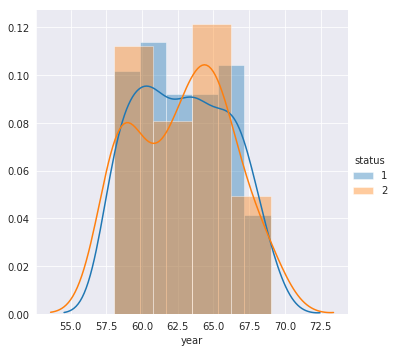

In [11]:
sns.FacetGrid(df, hue='status', size=5).map(sns.distplot,"year").add_legend()
plt.show()
#points are overlapping as we can see

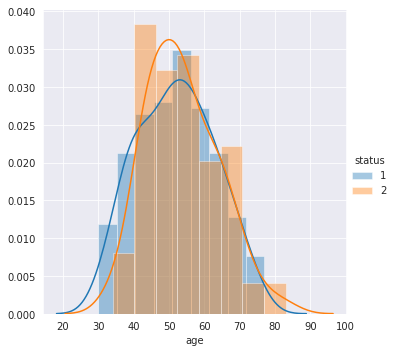

In [12]:
sns.FacetGrid(df, hue='status', size=5).map(sns.distplot, 'age').add_legend()
plt.show()

well the features are overlapping and we can't clearly make out anything but...
* patients with age less than 35 and greater than 30  survived more than 5 years after operation
* patients with age less than 83 and greater than 78 have survived not more than 5 years after operation
* patients from age 35 to 78 we can't say anything as point are almost overlapping.

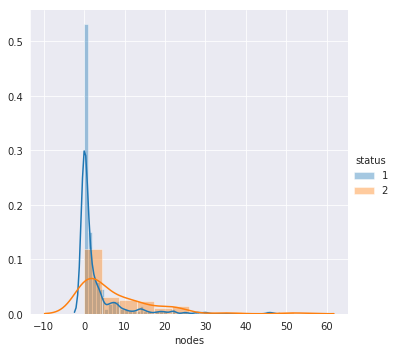

In [13]:
sns.FacetGrid(df, hue='status', size=5).map(sns.distplot, "nodes").add_legend()
plt.show()

with large number of positive axillary nodes survival status decreases  

**Box plot and Whiskers**

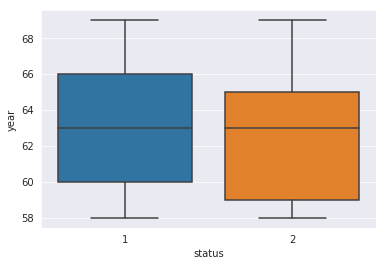

In [14]:
sns.boxplot(x='status', y='year', data=df)
plt.show()

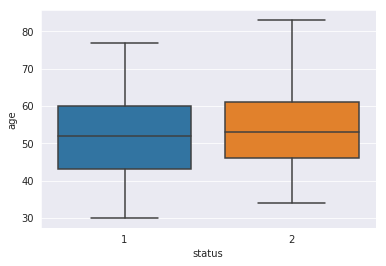

In [15]:
sns.boxplot(x='status', y='age', data=df)
plt.show()

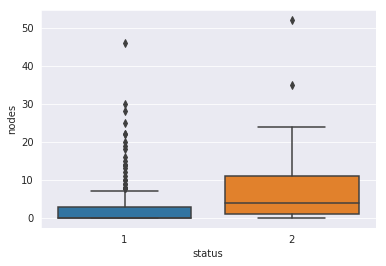

In [16]:
sns.boxplot(x='status', y='nodes', data=df)
plt.show()

In [17]:
#people most people who survived have zero positive axillary nodes

**Violin plots**

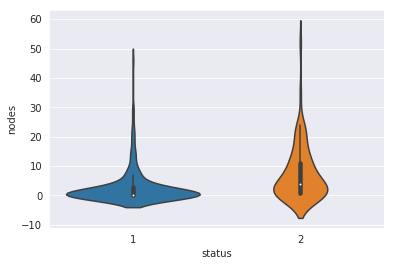

In [18]:
sns.violinplot(x='status' , y='nodes', data=df, size=8)
plt.show()

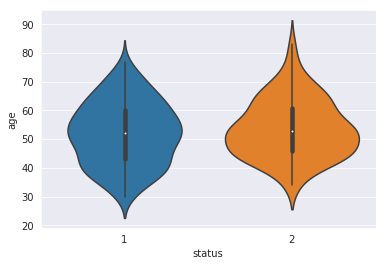

In [19]:
sns.violinplot(x='status', y='age', data=df, size=8)
plt.show()

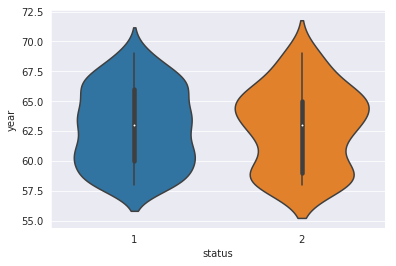

In [20]:
sns.violinplot(x='status', y='year', data=df, size=8)
plt.show()

**3D scatter plot with Plotly Express**

[https://plot.ly/python/3d-scatter-plots/](http://)

In [21]:
import plotly.express as px
fig = px.scatter_3d(df, x='age', y='nodes', z='year', color='status')
fig.show()

PDF and CDF


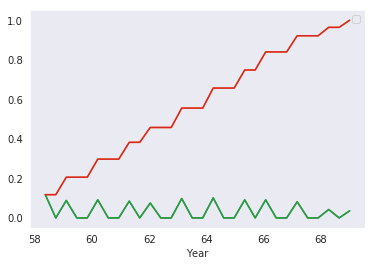

In [22]:
#pdf cdf of year
counts, bin_edges = np.histogram(df['year'], bins=30 , density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend()

counts, bin_edges = np.histogram(df['year'], bins=30, density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

plt.xlabel('Year')
plt.grid()
plt.show()

#pdf cdf of positive_axillary_nodes

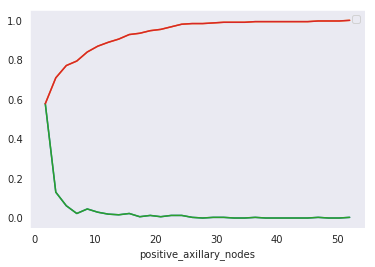

In [23]:
#pdf cdf of positive_axillary_nodes

counts,bin_edges = np.histogram(df['nodes'],bins = 30, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend()

counts,bin_edges = np.histogram(df['nodes'],bins = 30, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.xlabel('positive_axillary_nodes')
plt.grid()

plt.show()

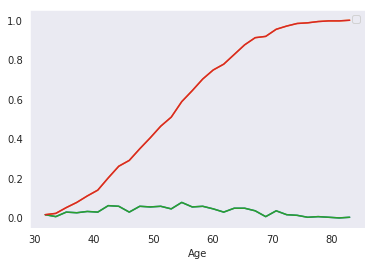

In [24]:
#pdf cdf of Age

counts,bin_edges = np.histogram(df['age'],bins = 30, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend()

counts,bin_edges = np.histogram(df['age'],bins = 30, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.xlabel('Age')
plt.grid()

plt.show()

**Pair-plot**

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning:

The `size` parameter has been renamed to `height`; pleaes update your code.

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



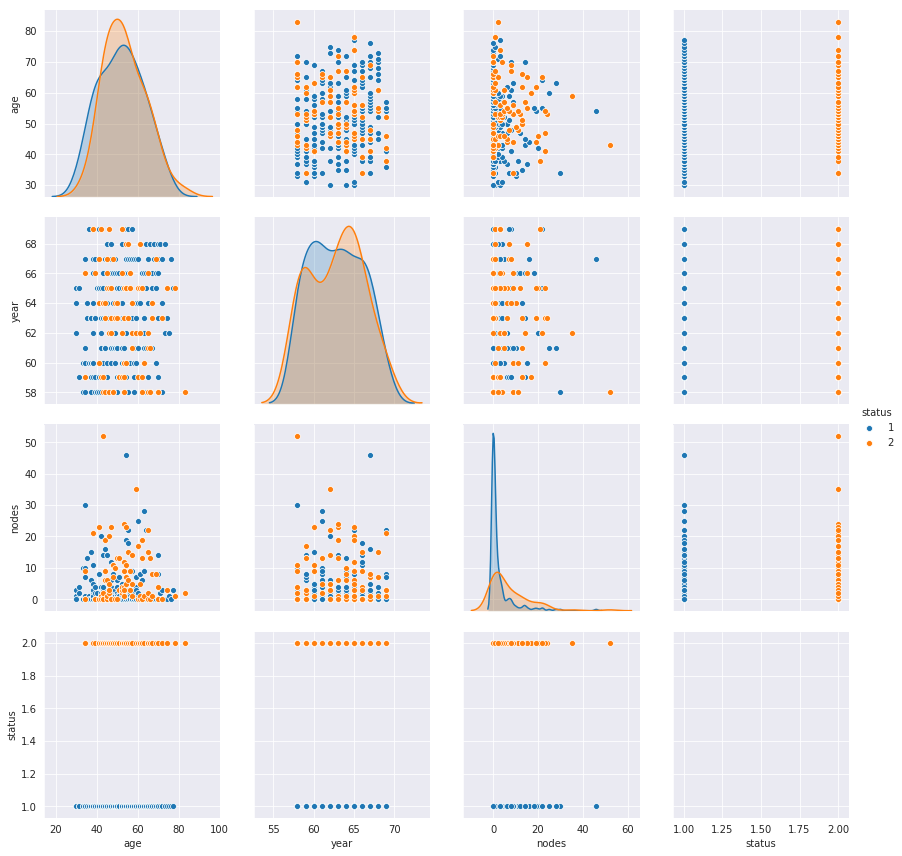

In [25]:
# pairwise scatter plot: Pair-Plot

plt.close();
sns.set_style("darkgrid");
sns.pairplot(df, hue='status', size=3)
plt.show()

**Observations**
* Positive_axillary_nodes is a useful feature to identify the survival_status of cancer patients
* Age and Year of operation have overlapping curves so we can't have a suitable observation that can classify survival_status

we have two classes 
1 = the patient survived 5 years or longer 
2 = the patient died within 5 year

**#mean: average**

In [26]:
survived_patients = df[df['status']==1]
not_survived = df[df['status']==2]


In [27]:
print(np.mean(survived_patients))

age       52.017778
year      62.862222
nodes      2.791111
status     1.000000
dtype: float64


In [28]:
print(np.mean(not_survived))

age       53.679012
year      62.827160
nodes      7.456790
status     2.000000
dtype: float64


**Observation**

* Mean age of patients who survived more than 5 years is 52 years and who didn't survive is 54 years
* Those having more than 3 positive_axillary_nodes they have not survived more than 5 years
* Those having less than 3 positive_axillary_nodes they have survived more than 5 years after the operation

/opt/conda/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning:

The following kwargs were not used by contour: 'heights'



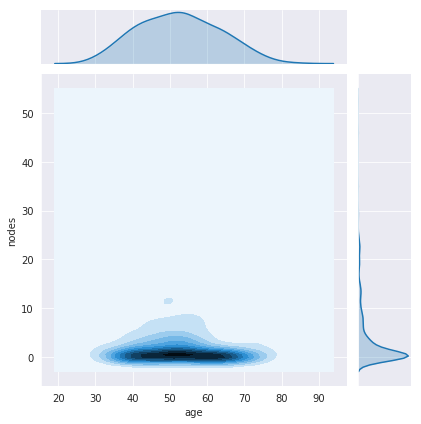

In [29]:
sns.jointplot(x='age', y='nodes', data=df, kind='kde', heights=6)
plt.show()

Final Conclusion
Those having more than 3 positive_axillary_nodes they have not survived more than 5 years
Those having less than 3 positive_axillary_nodes they have survived more than 5 years after the operation
Positive_axillary_nodes is a useful feature to identify the survival_status of cancer patients
Age and Year of operation have overlapping curves so we can't classify patients for their survival_status using age